In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.2 MB/s 


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
original = pd.read_csv('/content/drive/MyDrive/EM:IP/시간변경4번credit1.csv', sep=',')
original.head()

,number,ID,cnt,schoolid,StIDStd,event,time,event_number,event_value,network,fare_type,ticket_type,number_trips,OECD,credit,timestamp,instance,instance_id,reps,time_4
0,1,ARE000027907117,ARE,279,7117,START_ITEM,96.7,1,Start,NaN,NaN,NaN,NaN,0,1,12/22/2021 14:01,1,ARE000027907117-01,0,96.7
1,2,ARE000027907117,ARE,279,7117,ACER_EVENT,251.1,2,country_trains,country_trains,NaN,NaN,0.0,0,1,12/22/2021 14:04,3,ARE000027907117-03,0,251.1
2,3,ARE000027907117,ARE,279,7117,ACER_EVENT,253.2,3,Cancel,NaN,NaN,NaN,0.0,0,1,12/22/2021 14:04,11,ARE000027907117-11,0,253.2
3,4,ARE000027907117,ARE,279,7117,ACER_EVENT,254.1,4,city_subway,city_subway,NaN,NaN,0.0,0,1,12/22/2021 14:04,2,ARE000027907117-02,0,254.1
4,5,ARE000027907117,ARE,279,7117,ACER_EVENT,259.2,5,concession,city_subway,concession,NaN,0.0,0,1,12/22/2021 14:04,5,ARE000027907117-05,0,259.2


In [6]:
original[original.isnull().any(axis=1)]

,number,ID,cnt,schoolid,StIDStd,event,time,event_number,event_value,network,fare_type,ticket_type,number_trips,OECD,credit,timestamp,instance,instance_id,reps,time_4
0,1,ARE000027907117,ARE,279,7117,START_ITEM,96.7,1,Start,NaN,NaN,NaN,NaN,0,1,12/22/2021 14:01,1,ARE000027907117-01,0,96.7
1,2,ARE000027907117,ARE,279,7117,ACER_EVENT,251.1,2,country_trains,country_trains,NaN,NaN,0.0,0,1,12/22/2021 14:04,3,ARE000027907117-03,0,251.1
2,3,ARE000027907117,ARE,279,7117,ACER_EVENT,253.2,3,Cancel,NaN,NaN,NaN,0.0,0,1,12/22/2021 14:04,11,ARE000027907117-11,0,253.2
3,4,ARE000027907117,ARE,279,7117,ACER_EVENT,254.1,4,city_subway,city_subway,NaN,NaN,0.0,0,1,12/22/2021 14:04,2,ARE000027907117-02,0,254.1
4,5,ARE000027907117,ARE,279,7117,ACER_EVENT,259.2,5,concession,city_subway,concession,NaN,0.0,0,1,12/22/2021 14:04,5,ARE000027907117-05,0,259.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125474,20,USA000007902381,USA,79,2381,ACER_EVENT,1462.8,30,concession,city_subway,concession,NaN,0.0,1,1,12/22/2021 14:24,5,USA000007902381-05,0,1462.8
125476,22,USA000007902381,USA,79,2381,ACER_EVENT,1470.7,32,Cancel,NaN,NaN,NaN,0.0,1,1,12/22/2021 14:24,11,USA000007902381-11,0,1470.7
125477,23,USA000007902381,USA,79,2381,ACER_EVENT,1472.4,33,city_subway,city_subway,NaN,NaN,0.0,1,1,12/22/2021 14:24,2,USA000007902381-02,0,1472.4
125478,24,USA000007902381,USA,79,2381,ACER_EVENT,1473.5,34,concession,city_subway,concession,NaN,0.0,1,1,12/22/2021 14:24,5,USA000007902381-05,0,1473.5


In [ ]:
df = original[['ID','time_start','time_b1','time_b3','time_irrelevant','time_avg_btw_events']]
df.set_index('ID', inplace=True)
df

,time_start,time_b1,time_b3,time_irrelevant,time_avg_btw_events
ID,,,,,
ARE000027907117,154.4,8.0,35.4,10.4,4.286667
ARE000011302798,28.4,7.2,0.0,65.0,7.266667
ARE000018804820,40.8,10.5,0.0,2.9,5.880000
ARE000039910042,20.8,4.3,9.9,28.9,1.634884
ARE000006001557,9.3,3.8,0.0,29.9,3.524000
...,...,...,...,...,...
USA000015004612,15.7,8.3,0.0,1.6,2.250000
USA000015004637,19.8,11.5,0.0,4.4,4.170000
USA000007902358,24.7,12.9,0.0,1.4,6.275000


In [ ]:
df = df[np.isfinite(df).all(1)]
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7191 entries, ARE000027907117 to USA000007902381
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_start           7191 non-null   float64
 1   time_b1              7191 non-null   float64
 2   time_b3              7191 non-null   float64
 3   time_irrelevant      7191 non-null   float64
 4   time_avg_btw_events  7191 non-null   float64
dtypes: float64(5)
memory usage: 337.1+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7191 entries, ARE000027907117 to USA000007902381
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_start           7191 non-null   float64
 1   time_b1              7191 non-null   float64
 2   time_b3              7191 non-null   float64
 3   time_irrelevant      7191 non-null   float64
 4   time_avg_btw_events  7191 non-null   float64
dtypes: float64(5)
memory usage: 337.1+ KB


In [ ]:
df_2 = df[['time_start','time_b1','time_b3','time_irrelevant','time_avg_btw_events']]
df_2

,time_start,time_b1,time_b3,time_irrelevant,time_avg_btw_events
ID,,,,,
ARE000027907117,154.4,8.0,35.4,10.4,4.286667
ARE000011302798,28.4,7.2,0.0,65.0,7.266667
ARE000018804820,40.8,10.5,0.0,2.9,5.880000
ARE000039910042,20.8,4.3,9.9,28.9,1.634884
ARE000006001557,9.3,3.8,0.0,29.9,3.524000
...,...,...,...,...,...
USA000015004612,15.7,8.3,0.0,1.6,2.250000
USA000015004637,19.8,11.5,0.0,4.4,4.170000
USA000007902358,24.7,12.9,0.0,1.4,6.275000


In [ ]:
x = df_2.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_2.columns, index = df_2.index)
df_scale

,time_start,time_b1,time_b3,time_irrelevant,time_avg_btw_events
ID,,,,,
ARE000027907117,13.192308,0.000000,2.681818,1.096774,0.698764
ARE000011302798,1.076923,-0.126984,0.000000,9.903226,2.317145
ARE000018804820,2.269231,0.396825,0.000000,-0.112903,1.564073
ARE000039910042,0.346154,-0.587302,0.750000,4.080645,-0.741369
ARE000006001557,-0.759615,-0.666667,0.000000,4.241935,0.284574
...,...,...,...,...,...
USA000015004612,-0.144231,0.047619,0.000000,-0.322581,-0.407311
USA000015004637,0.250000,0.555556,0.000000,0.129032,0.635405
USA000007902358,0.721154,0.777778,0.000000,-0.354839,1.778590


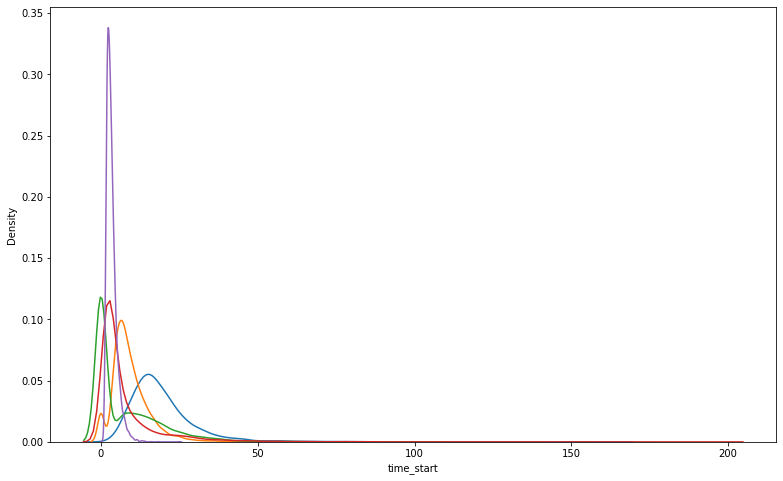

In [ ]:
sns.kdeplot(df['time_start'])
sns.kdeplot(df['time_b1'])
sns.kdeplot(df['time_b3'])
sns.kdeplot(df['time_irrelevant'])
sns.kdeplot(df['time_avg_btw_events'])

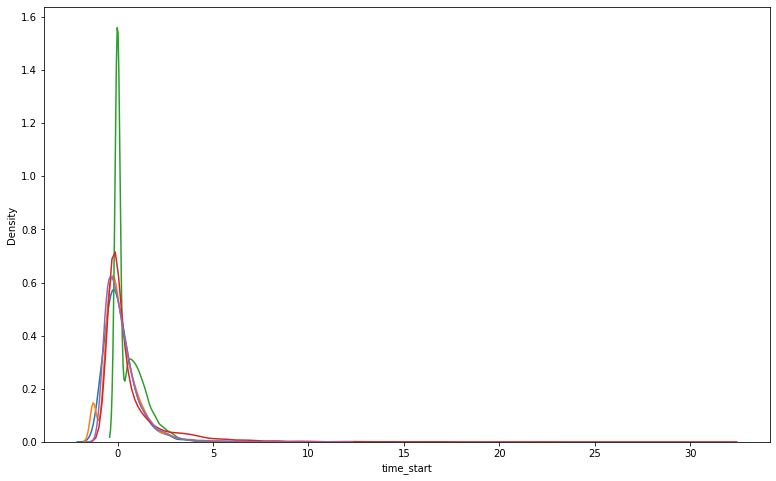

In [ ]:
sns.kdeplot(df_scale['time_start'])
sns.kdeplot(df_scale['time_b1'])
sns.kdeplot(df_scale['time_b3'])
sns.kdeplot(df_scale['time_irrelevant'])
sns.kdeplot(df_scale['time_avg_btw_events'])

100%|██████████| 14/14 [00:36<00:00,  2.59s/it]


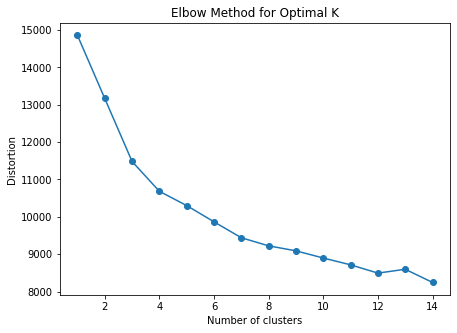

In [ ]:
distortions = []
for i in tqdm(range(1, 15)):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
num = 4
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

[2 0 3 ... 3 1 1]


In [ ]:
df_scale['cluster'] = kmedoids.labels_
df_scale

,time_start,time_b1,time_b3,time_irrelevant,time_avg_btw_events,cluster
ID,,,,,,
ARE000027907117,13.192308,0.000000,2.681818,1.096774,0.698764,2
ARE000011302798,1.076923,-0.126984,0.000000,9.903226,2.317145,0
ARE000018804820,2.269231,0.396825,0.000000,-0.112903,1.564073,3
ARE000039910042,0.346154,-0.587302,0.750000,4.080645,-0.741369,0
ARE000006001557,-0.759615,-0.666667,0.000000,4.241935,0.284574,0
...,...,...,...,...,...,...
USA000015004612,-0.144231,0.047619,0.000000,-0.322581,-0.407311,1
USA000015004637,0.250000,0.555556,0.000000,0.129032,0.635405,3
USA000007902358,0.721154,0.777778,0.000000,-0.354839,1.778590,3


,cluster
ID,
ARE000027907117,2
ARE000011302798,0
ARE000018804820,3
ARE000039910042,0
ARE000006001557,0
...,...
USA000015004612,1
USA000015004637,3
USA000007902358,3


In [ ]:
original['cluster'] = kmedoids.labels_
original

,ID,cnt,time_a,time_b1,time_b2,time_b3,time_b4,time_start,time_solving,time_total,...,events_num,sequence,length,credit,OECD,ratio,mean,weight,gender,cluster
0,ARE000027907117,ARE,10.5,8.0,0.0,35.4,0.0,154.4,64.3,218.7,...,15,bab,3,1,0,0.64,391.500000,7638.195150,2,2
1,ARE000011302798,ARE,145.8,7.2,0.0,0.0,0.0,28.4,218.0,246.4,...,30,aab,3,1,0,0.37,212.100000,4349.167700,2,0
2,ARE000018804820,ARE,45.4,10.5,0.0,0.0,0.0,40.8,58.8,99.6,...,10,ab,2,1,0,0.28,168.500000,3287.447976,1,3
3,ARE000039910042,ARE,10.9,4.3,0.0,9.9,16.3,20.8,70.3,91.1,...,43,babab,5,1,0,0.37,227.000000,4428.787482,1,0
4,ARE000006001557,ARE,23.9,3.8,0.0,0.0,30.5,9.3,88.1,97.4,...,25,abab,4,1,0,0.61,338.428571,7308.636611,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,USA000015004612,USA,8.1,8.3,0.0,0.0,0.0,15.7,18.0,33.7,...,8,ab,2,1,1,0.81,446.571429,9644.068403,1,1
7187,USA000015004637,USA,25.8,11.5,0.0,0.0,0.0,19.8,41.7,61.5,...,10,ab,2,1,1,0.38,232.100000,4528.288874,2,3
7188,USA000007902358,USA,35.9,12.9,0.0,0.0,0.0,24.7,50.2,74.9,...,8,ab,2,1,1,0.79,430.947368,9433.340364,1,3
7189,USA000007902371,USA,33.3,0.0,15.8,0.0,0.0,11.9,50.0,61.9,...,11,ab,2,1,1,0.37,225.600000,4401.473374,1,1


In [ ]:
original.to_csv('5_NewClustering_1_start,b1,b3,time_irrelevant,time_avg_btw_events_4C.csv')

# 두 변수 상관이 너무 높음

In [ ]:
# 3차원 코드 참고
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r','b','g','purple','orange','gray']

for i, color in enumerate(colors):
    x = df_scale[df_scale['cluster'] == i]['time_not_answer']
    y = df_scale[df_scale['cluster'] == i]['length']
    z = df_scale[df_scale['cluster'] == i]['avg_time_btw_events']
    ax.scatter(x,y,z,c=color,marker='o')

ax.set_xlabel('time_not_answer')
ax.set_ylabel('length')
ax.set_zlabel('avg_time_btw_eventstime_start')

In [ ]:
start time, squence 갯수, avg
not_answertime, avg, squence 갯수


sns.kdeplot(df_scale['time_start'])
sns.kdeplot(df_scale['time_b1'])
sns.kdeplot(df_scale['time_b3'])
sns.kdeplot(df_scale['time_irrelevant'])
sns.kdeplot(df_scale['time_avg_btw_events'])